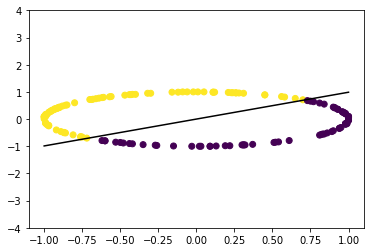

In [63]:
import numpy as np

# Set and plot the data
import matplotlib.pyplot as plt
data = open("two_circle.txt", "r")
XX = []
YY = []
datos = []

labels = []
colors = ["blue", "red"]
shapes = ["o","^"]

for line in data:
    tmp = line.split()
    XX.append(float(tmp[0]))
    YY.append(float(tmp[1]))
    labels.append(int(tmp[2]))
    datos.append([float(tmp[0]), float(tmp[1]), int(tmp[2])])

data.close()
#print(datos)
datos = np.array(datos)


# # https://towardsdatascience.com/perceptron-and-its-implementation-in-python-f87d6c7aa428
# def perceptron(data, num_iter):
#     features = data[:, :-1]
#     labels = data[:, -1]
    
#     # set weights to zero
#     w = np.zeros(shape=(1, features.shape[1]+1))
    
#     misclassified_ = [] 
  
#     for epoch in range(num_iter):
#         misclassified = 0
#         for x, label in zip(features, labels):
#             x = np.insert(x,0,1)
#             y = np.dot(w, x.transpose())
#             target = 1.0 if (y > 0) else 0.0
#             #print((label))
#             delta = (label.item(0) - target)
            
#             if(delta): # misclassified
#                 misclassified += 1
#                 w += (delta * x)
        
#         misclassified_.append(misclassified)
#     return (w, misclassified_)
             
# num_iter = 100
# w, misclassified_ = perceptron(datos, num_iter)
# print(w)
# print(misclassified_)

# epochs = np.arange(1, num_iter+1)
# plt.plot(epochs, misclassified_)
# plt.xlabel('iterations')
# plt.ylabel('misclassified')
# plt.show()











import numpy as np

class Perceptron:

    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):
            
            for idx, x_i in enumerate(X):

                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                
                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)

                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x>=0, 1, 0)





# class Perceptron:
#     def __init__(self, learning_rate=0.01, n_iters=1000):
#         self.lr = learning_rate
#         self.n_iters = n_iters
#         self.activation_func = self._unit_step_func
#         self.weights = None
#         self.bias = None

#     def fit(self, X, y):
#         n_samples, n_features = X.shape

#         # init parameters
#         self.weights = np.zeros(n_features)
#         self.bias = 0

#         y_ = np.array([1 if i > 0 else 0 for i in y])

#         for _ in range(self.n_iters):

#             for idx, x_i in enumerate(X):

#                 linear_output = np.dot(x_i, self.weights) + self.bias
#                 y_predicted = self.activation_func(linear_output)

#                 # Perceptron update rule
#                 update = self.lr * (y_[idx] - y_predicted)

#                 self.weights += update * x_i
#                 self.bias += update

#     def predict(self, X):
#         linear_output = np.dot(X, self.weights) + self.bias
#         y_predicted = self.activation_func(linear_output)
#         return y_predicted

#     def _unit_step_func(self, x):
#         return np.where(x >= 0, 1, 0)

    
    
# #Set pre-process data
# import random as rnd

# """
# SPLIT DATA 50-50, RETURN S(=TRAIN) AND T(=TEST)
# """
# def splitData5050(X,Y,labels):
#     S = [] 
#     T = []
#     for i in range(len(X)):
#         if (rnd.getrandbits(1) == 1 and len(S)<(len(X)/2)) or len(T) >=(len(X)/2) :
#             S.append((X[i],Y[i],labels[i]))
#         else:
#             T.append((X[i],Y[i],labels[i]))
        
            
#     return S,T



# Testing
if __name__ == "__main__":
#     Imports
#     import matplotlib.pyplot as plt
#     from sklearn.model_selection import train_test_split
#     from sklearn import datasets

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

#     X, y = datasets.make_blobs(
#         n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2
#     )
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.2, random_state=123
#     )

    X_train = datos[:, :-1]
    y_train = datos[:, -1]
    
    
    #X_train, X_test, y_train, y_test = 

    p = Perceptron(learning_rate=0.01, n_iters=1000)
    p.fit(X_train, y_train)
    
    #predictions = p.predict(X_test)
    #print("Perceptron classification accuracy", accuracy(y_test, predictions))

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

    x0_1 = np.amin(X_train[:, 0])
    x0_2 = np.amax(X_train[:, 0])

    x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
    x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

    ymin = np.amin(X_train[:, 1])
    ymax = np.amax(X_train[:, 1])
    ax.set_ylim([ymin - 3, ymax + 3])

    plt.show()